In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:

np.random.seed(42)
X = np.random.uniform(-3, 3, (300, 2))
y = (X[:,1] > X[:,0]**2 - 1).astype(int)

data = pd.DataFrame(X, columns=['x1','x2'])
data['label'] = y

print("Shape of data:", data.shape)
print(data.head())


print("\nMissing values:\n", data.isnull().sum())


Shape of data: (300, 3)
         x1        x2  label
0 -0.752759  2.704286      1
1  1.391964  0.591951      0
2 -2.063888 -2.064033      0
3 -2.651498  2.197057      0
4  0.606690  1.248435      1

Missing values:
 x1       0
x2       0
label    0
dtype: int64


In [3]:
X = data[['x1','x2']]
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("\nShapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)




Shapes: (210, 2) (210,) (90, 2) (90,)


In [4]:

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [5]:
model = SVC(kernel='rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("\nSVC [rbf] predictions:\n", y_pred)
print("\nConfusion Matrix (rbf):\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred))




SVC [rbf] predictions:
 [0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0]

Confusion Matrix (rbf):
 [[62  0]
 [ 1 27]]

Accuracy: 0.9888888888888889

Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.96      0.98        28

    accuracy                           0.99        90
   macro avg       0.99      0.98      0.99        90
weighted avg       0.99      0.99      0.99        90



In [7]:
model = SVC(kernel='linear', random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("\nSVC [linear] predictions:\n", y_pred)
print("\nConfusion Matrix (linear):\n", confusion_matrix(y_test, y_pred))





SVC [linear] predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Confusion Matrix (linear):
 [[62  0]
 [28  0]]


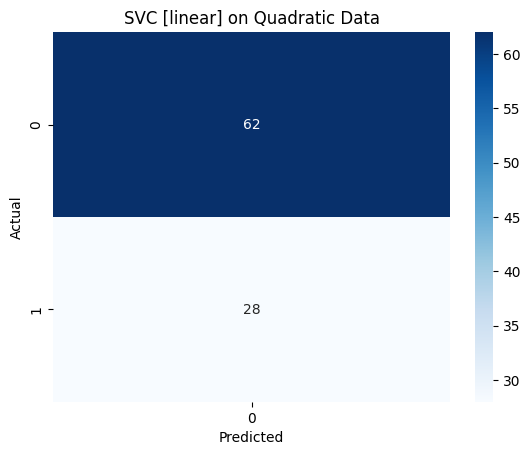

In [8]:
conf_mat_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat_df, annot=True, fmt='d', cmap='Blues')
plt.title('SVC [linear] on Quadratic Data')
plt.show()
